#### Packages

In [159]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from functools import partial
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
     (Stepwise,
      sklearn_selected,
      sklearn_selection_path)


import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
import random
random.seed(0)

# Applied Question
#8 page 286

### a. Create a random number generator and use its normal() method to generate a predictor X of length n = 100, as well as a noise vector ε of length n = 100.

https://numpy.org/doc/2.1/reference/random/generated/numpy.random.normal.html

In [160]:
x = np.random.normal(0, 1, 100)
e = np.random.normal(0, 1, 100)
np.mean(e**2)

1.0224692154248043

### b. 	Generate a response vector Y of length n = 100 according to the model 			Y =β_0  + β_1 X + β_2 X^2  + β_3 X^3  + ε, 				    where β_0, β_1, β_2, and β_3 are constants of your choice. 

In [161]:
B0 = 1
B1 = 10
B2 = 100
B3 = 1000
y = B0+B1*x+B2*x**2+B3*x**3+e

### c. 	Use forward stepwise selection in order to select a model containing the predictors X,X^2,...,X^10. What is the model obtained according to C_p? Report the coefficients of the model obtained. 

https://www.w3schools.com/python/pandas/pandas_dataframes.asp

In [162]:
X = {"x": x, "x2": x**2, "x3": x**3, "x4": x**4, "x5": x**5, "x6": x**6, "x7": x**7, "x8": x**8, "x9": x**9, "x10": x**10}
X = pd.DataFrame(X)
print(X)

           x        x2        x3            x4            x5            x6  \
0  -0.138043  0.019056 -0.002631  3.631293e-04 -5.012756e-05  6.919774e-06   
1   0.688088  0.473465  0.325785  2.241687e-01  1.542477e-01  1.061359e-01   
2   1.758406  3.091993  5.436979  9.560419e+00  1.681110e+01  2.956075e+01   
3   1.056395  1.115970  1.178906  1.245390e+00  1.315624e+00  1.389818e+00   
4   0.024218  0.000586  0.000014  3.439802e-07  8.330418e-09  2.017438e-10   
..       ...       ...       ...           ...           ...           ...   
95  0.951075  0.904544  0.860289  8.181996e-01  7.781693e-01  7.400975e-01   
96 -1.664445  2.770378 -4.611143  7.674996e+00 -1.277461e+01  2.126264e+01   
97 -0.023823  0.000568 -0.000014  3.220993e-07 -7.673389e-09  1.828036e-10   
98  1.617690  2.616919  4.233363  6.848268e+00  1.107837e+01  1.792137e+01   
99  1.514756  2.294486  3.475586  5.264665e+00  7.974684e+00  1.207970e+01   

              x7            x8            x9           x10  
0 

As shown in the ISLP textbook. 

In [163]:
def nCp(sigma2, estimator, X, Y):
    "Negative Cp statistic"
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n 

In [164]:
design = MS(X.columns).fit(X)
Y = y
X = design.transform(X)
sigma2 = OLS(Y,X).fit().scale


In [165]:
neg_Cp = partial(nCp, sigma2)

strategy = Stepwise.first_peak(design,
                               direction='forward',
                               max_terms=len(design.terms))

Model_MSE = sklearn_selected(OLS,
                               strategy)
Model_MSE.fit(X, Y)
Model_MSE.selected_state_

('x', 'x10', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9')

In [166]:
Model_Cp = sklearn_selected(OLS,
                               strategy,
                               scoring=neg_Cp)
Model_Cp.fit(X, Y)
Model_Cp.selected_state_

('x', 'x2', 'x3', 'x4')

In [322]:
X = {"x": x, "x2": x**2, "x3": x**3, "x4": x**4, "x5": x**5, "x6": x**6, "x7": x**7, "x8": x**8, "x9": x**9, "x10": x**10}
X = pd.DataFrame(X)

X = MS(['x', 'x2', 'x3', 'x4']).fit_transform(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.316e+08
Date:                Sat, 18 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:29:11   Log-Likelihood:                -140.30
No. Observations:                 100   AIC:                             290.6
Df Residuals:                      95   BIC:                             303.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7342      0.145      5.055      0.000       0.446       1.023
x             10.0902      0.174     58.003      0.000       9.745      10.436
x2           100.2756      0.171    587.963      0.000      99.937     100.614
x3          1000.0263      0.049   2.05e+04      0.000     999.930    1000.123
x4            -0.0399      0.027     -1.453      0.149      -0.094       0.015
==============================================================================
Omnibus:                        0.240   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.887   Jarque-Bera (JB):                0.421
Skew:                           0.032   Prob(JB):                        0.810
Kurtosis:                       2.689   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [323]:
results.mse_model

440117563.9071189

### d.	Repeat (c), using backwards stepwise selection. How does your answer compare to the results in (c)? 

In [324]:
X = {"x": x, "x2": x**2, "x3": x**3, "x4": x**4, "x5": x**5, "x6": x**6, "x7": x**7, "x8": x**8, "x9": x**9, "x10": x**10}
X = pd.DataFrame(X)

design = MS(X.columns).fit(X)
Y = y
X = design.transform(X)
sigma2 = OLS(Y,X).fit().scale

In [325]:
neg_Cp = partial(nCp, sigma2)

strategy = Stepwise.first_peak(design,
                               direction='backwards',
                               max_terms=len(design.terms))

Model_MSE = sklearn_selected(OLS,
                               strategy)
Model_MSE.fit(X, Y)
Model_MSE.selected_state_

('x', 'x10', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9')

In [326]:
Model_Cp = sklearn_selected(OLS,
                               strategy,
                               scoring=neg_Cp)
Model_Cp.fit(X, Y)
Model_Cp.selected_state_

('x', 'x2', 'x3', 'x4')

In [327]:
X = {"x": x, "x2": x**2, "x3": x**3, "x4": x**4, "x5": x**5, "x6": x**6, "x7": x**7, "x8": x**8, "x9": x**9, "x10": x**10}
X = pd.DataFrame(X)

X = MS(['x', 'x2', 'x3', 'x4']).fit_transform(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.316e+08
Date:                Sat, 18 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:29:21   Log-Likelihood:                -140.30
No. Observations:                 100   AIC:                             290.6
Df Residuals:                      95   BIC:                             303.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7342      0.145      5.055      0.000       0.446       1.023
x             10.0902      0.174     58.003      0.000       9.745      10.436
x2           100.2756      0.171    587.963      0.000      99.937     100.614
x3          1000.0263      0.049   2.05e+04      0.000     999.930    1000.123
x4            -0.0399      0.027     -1.453      0.149      -0.094       0.015
==============================================================================
Omnibus:                        0.240   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.887   Jarque-Bera (JB):                0.421
Skew:                           0.032   Prob(JB):                        0.810
Kurtosis:                       2.689   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [328]:
results.mse_model

440117563.9071189

### e.	Now fit a lasso model to the simulated data  
As shown in the textbook. 

In [380]:
X = {"x": x, "x2": x**2, "x3": x**3, "x4": x**4, "x5": x**5, "x6": x**6, "x7": x**7, "x8": x**8, "x9": x**9, "x10": x**10}
X = pd.DataFrame(X)
Y = y
D = design.fit_transform(X)
D = D.drop('intercept', axis=1)
X = np.asarray(D)

Xs = X - X.mean(0)[None,:]
X_scale = X.std(0)
Xs = Xs / X_scale[None,:]
lambdas, soln_array = skl.Lasso.path(Xs, 
                                    Y,
                                    l1_ratio=1,
                                    n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns,
                         index=-np.log(lambdas))



In [381]:

K = 5
kfold = skm.KFold(K,
                  random_state=0,
                  shuffle=True)
scaler = StandardScaler(with_mean=True,  with_std=True)
lassoCV = skl.ElasticNetCV(n_alphas=100, 
                           l1_ratio=1,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
print('Lambda', tuned_lasso.alpha_)
print('-Log Lambda', -np.log(tuned_lasso.alpha_))

Lambda 4.193255993036028
-Log Lambda -1.4334775188019913


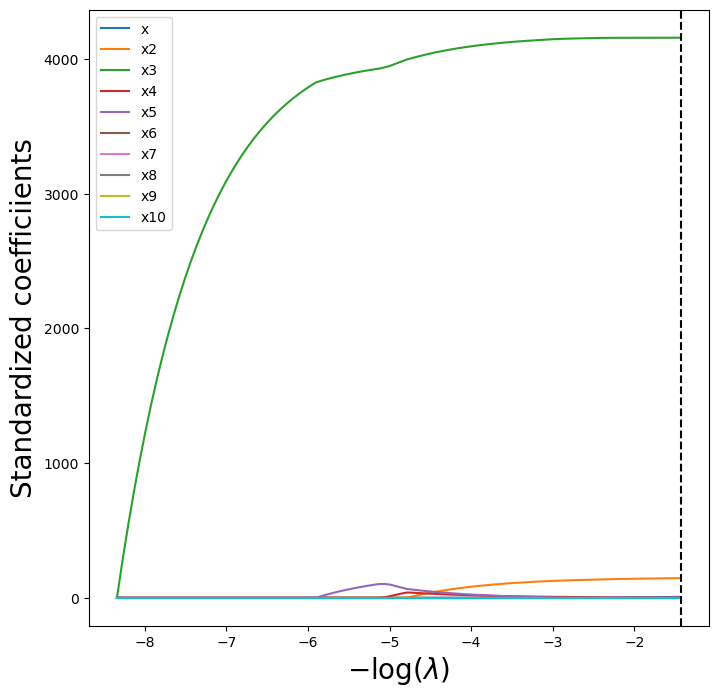

In [382]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);

In [383]:
np.min(tuned_lasso.mse_path_.mean(1))


166.21386059143714

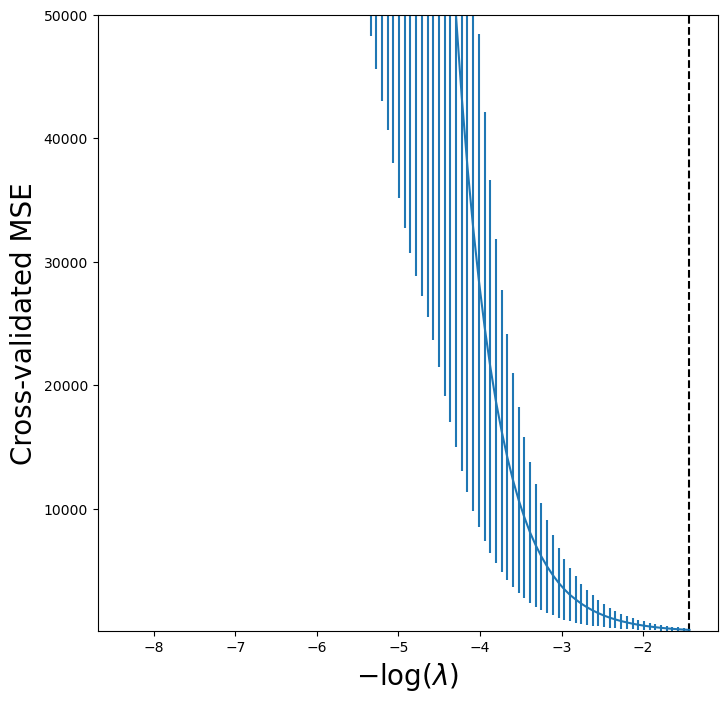

In [384]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_ylim([100,50000])
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [385]:
print(tuned_lasso.coef_)
print(tuned_lasso.intercept_)

[8.38749189e+00 1.45405018e+02 4.15440161e+03 0.00000000e+00
 3.14709030e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
111.94320815799175


https://www.kirenz.com/blog/posts/2019-08-12-python-lasso-regression-auto/

R squared training set 100.0
int 111.94320815799175
coef [8.38749189e+00 1.45405018e+02 4.15440161e+03 0.00000000e+00
 3.14709030e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE 37.69384860251738


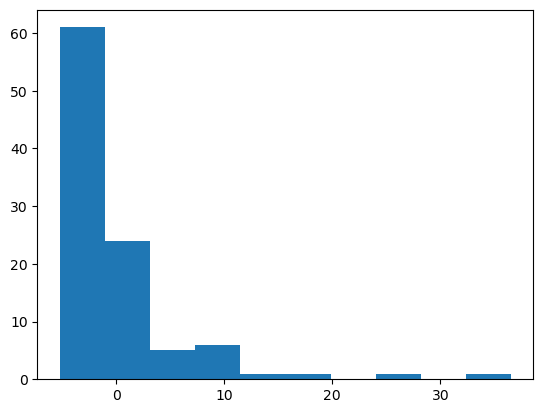

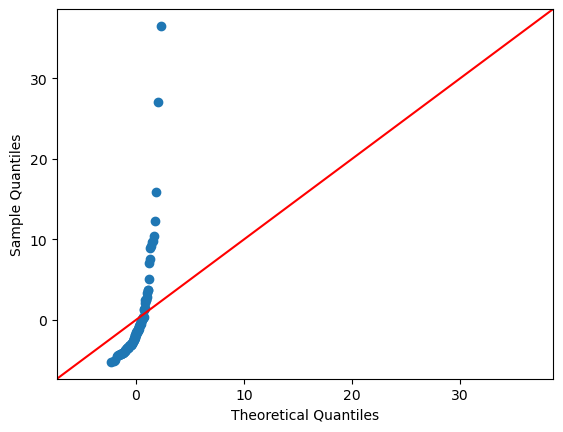

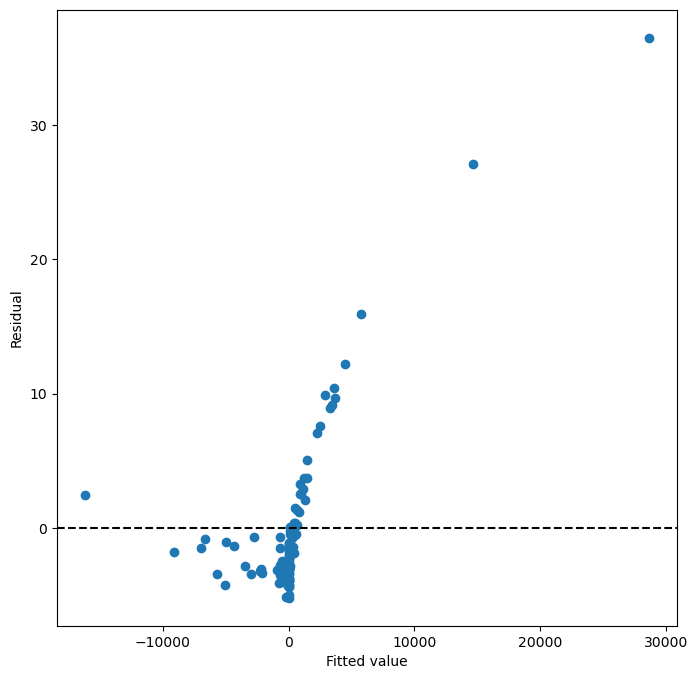

In [386]:
reg = skl.Lasso(tuned_lasso.alpha_, fit_intercept = True)
reg.fit(Xs,Y)
print('R squared training set', round(reg.score(Xs, Y)*100, 2))
print('int', reg.intercept_)
print('coef', reg.coef_)

Y_pred = reg.predict(Xs)
resid = Y - Y_pred
plt.hist(resid)
sm.qqplot(resid, line ='45') 
print('MSE',np.mean(resid**2))


ax = subplots(figsize=(8,8))[1]
ax.scatter(Y_pred, resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

### f. Now generate a response vector Y according to the model Y =β_0  + β_7 X^7+ ε, and perform forward stepwise selection and the lasso. Discuss the results obtained.

#### Forward

In [387]:
B7 = 10000000
y2 = B0+B7*x**7+e
X = {"x": x, "x2": x**2, "x3": x**3, "x4": x**4, "x5": x**5, "x6": x**6, "x7": x**7, "x8": x**8, "x9": x**9, "x10": x**10}
X = pd.DataFrame(X)

In [388]:
def nCp(sigma2, estimator, X, Y):
    "Negative Cp statistic"
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n 

In [389]:
design = MS(X.columns).fit(X)
Y = y2
X = design.transform(X)
sigma2 = OLS(Y,X).fit().scale
sigma2

1.0494059082747955

In [390]:
neg_Cp = partial(nCp, sigma2)

strategy = Stepwise.first_peak(design,
                               direction='forward',
                               max_terms=len(design.terms))

Model_MSE = sklearn_selected(OLS,
                               strategy)
Model_MSE.fit(X, Y)
Model_MSE.selected_state_

('x7',)

In [391]:
Model_Cp = sklearn_selected(OLS,
                               strategy,
                               scoring=neg_Cp)
Model_Cp.fit(X, Y)
Model_Cp.selected_state_

('x3', 'x7')

##### Forward based on MSE

In [392]:
X = {"x": x, "x2": x**2, "x3": x**3, "x4": x**4, "x5": x**5, "x6": x**6, "x7": x**7, "x8": x**8, "x9": x**9, "x10": x**10}
X = pd.DataFrame(X)

X = MS(['x7']).fit_transform(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.002e+20
Date:                Sat, 18 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:41:59   Log-Likelihood:                -142.45
No. Observations:                 100   AIC:                             288.9
Df Residuals:                      98   BIC:                             294.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8953      0.102      8.796      0.000       0.693       1.097
x7              1e+07      0.000   2.45e+10      0.000       1e+07       1e+07
==============================================================================
Omnibus:                        0.285   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.462
Skew:                          -0.006   Prob(JB):                        0.794
Kurtosis:                       2.667   Cond. No.                         250.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE 1.011152282861389


60

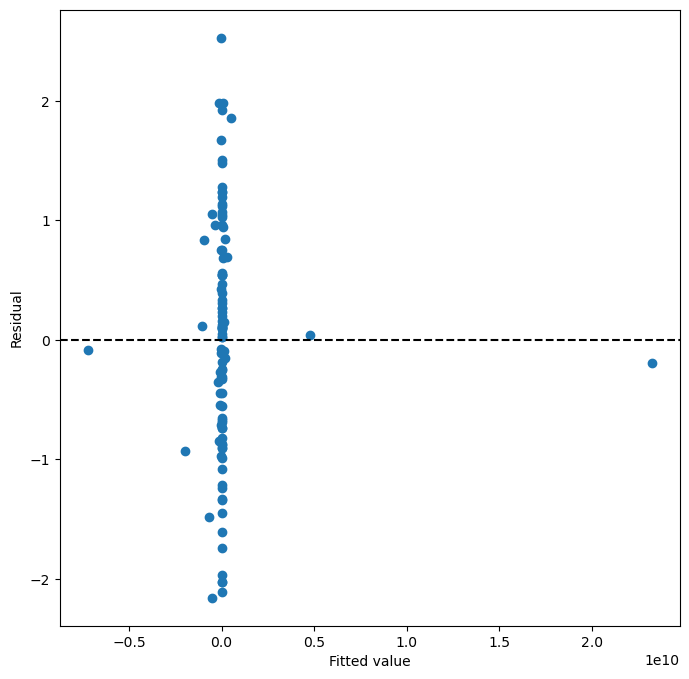

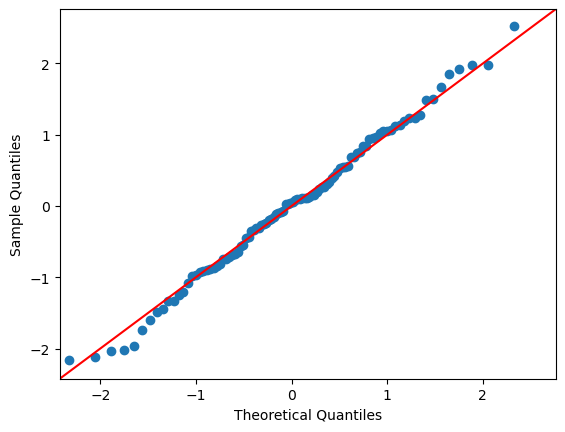

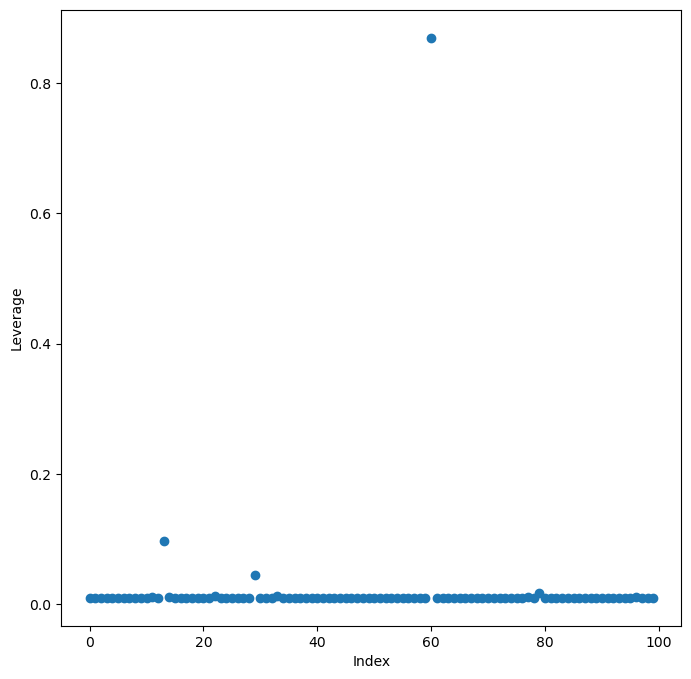

In [393]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

sm.qqplot(results.resid, line ='45') 
print('MSE',np.mean(results.resid**2))

infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

##### Forward based on Cp

In [394]:
X = {"x": x, "x2": x**2, "x3": x**3, "x4": x**4, "x5": x**5, "x6": x**6, "x7": x**7, "x8": x**8, "x9": x**9, "x10": x**10}
X = pd.DataFrame(X)

X = MS(['x3', 'x7']).fit_transform(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.037e+20
Date:                Sat, 18 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:42:01   Log-Likelihood:                -141.34
No. Observations:                 100   AIC:                             288.7
Df Residuals:                      97   BIC:                             296.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9107      0.102      8.954      0.000       0.709       1.113
x3             0.0691      0.047      1.478      0.143      -0.024       0.162
x7              1e+07      0.001   1.28e+10      0.000       1e+07       1e+07
==============================================================================
Omnibus:                        0.208   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.901   Jarque-Bera (JB):                0.391
Skew:                           0.020   Prob(JB):                        0.822
Kurtosis:                       2.696   Cond. No.                         252.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE 0.9888879858237694


60

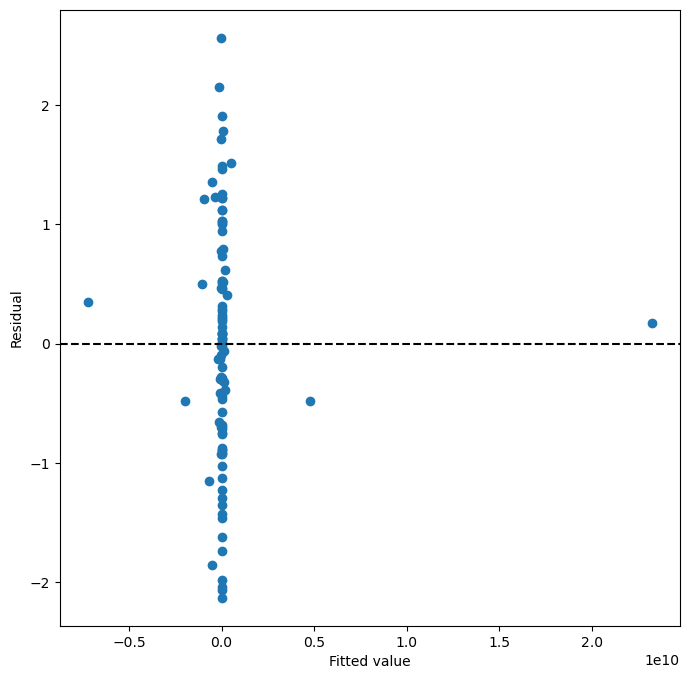

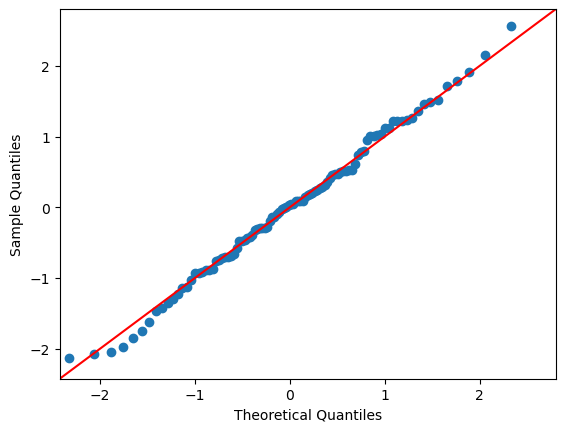

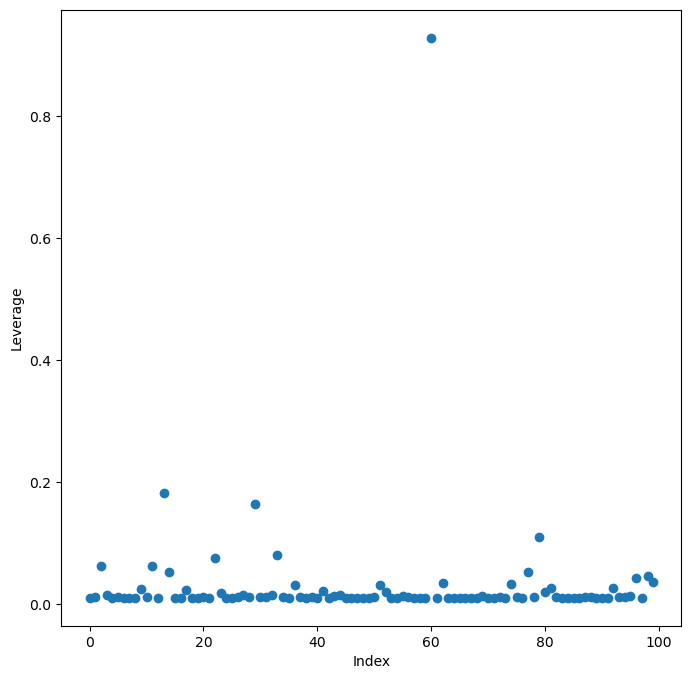

In [395]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

sm.qqplot(results.resid, line ='45') 
print('MSE',np.mean(results.resid**2))

infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

#### Lasso

In [397]:
X = {"x": x, "x2": x**2, "x3": x**3, "x4": x**4, "x5": x**5, "x6": x**6, "x7": x**7, "x8": x**8, "x9": x**9, "x10": x**10}
X = pd.DataFrame(X)
Y = y2

D = design.fit_transform(X)
D = D.drop('intercept', axis=1)
X = np.asarray(D)

Xs = X - X.mean(0)[None,:]
X_scale = X.std(0)
Xs = Xs / X_scale[None,:]
lambdas, soln_array = skl.Lasso.path(Xs, 
                                    Y,
                                    l1_ratio=1,
                                    n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns,
                         index=-np.log(lambdas))

In [398]:

K = 5
kfold = skm.KFold(K,
                  random_state=0,
                  shuffle=True)
scaler = StandardScaler(with_mean=True,  with_std=True)
lassoCV = skl.ElasticNetCV(n_alphas=100, 
                           l1_ratio=1,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
print('Lambda', tuned_lasso.alpha_)
print('-Log Lambda', -np.log(tuned_lasso.alpha_))

Lambda 2488609.819743019
-Log Lambda -14.72723480720635


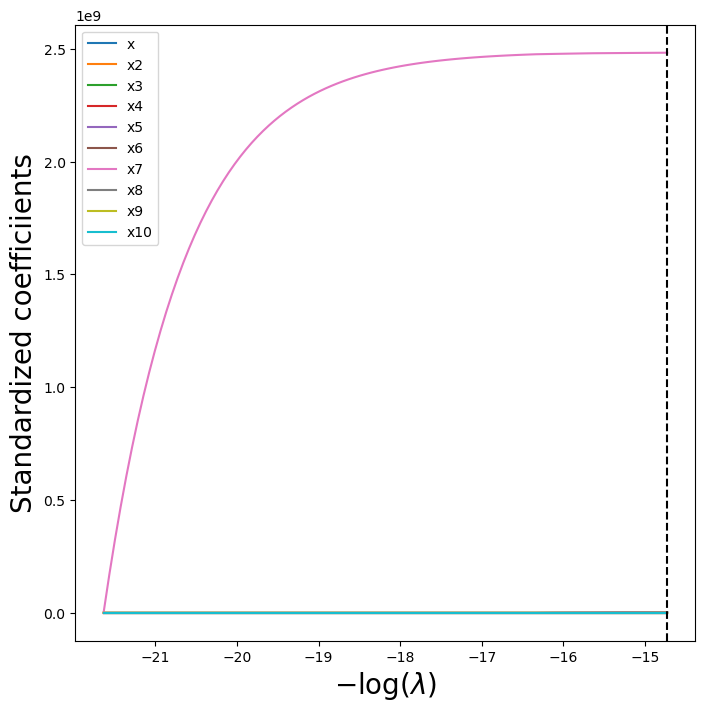

In [399]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);

In [400]:
np.min(tuned_lasso.mse_path_.mean(1))


2723906709035927.5

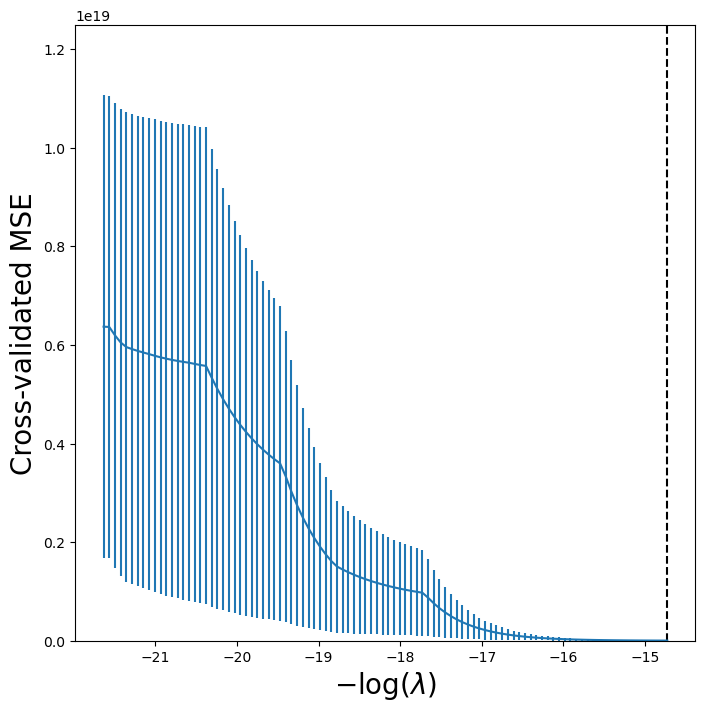

In [401]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_ylim([0,1.25e19])
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [402]:
print(tuned_lasso.coef_)
print(tuned_lasso.intercept_)

[-1.32132988e+07  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  3.30623872e+08 -0.00000000e+00  1.69738727e+09 -0.00000000e+00
  4.73578629e+08 -0.00000000e+00]
159312588.6203575


R squared training set 100.0
MSE 217030040706285.16


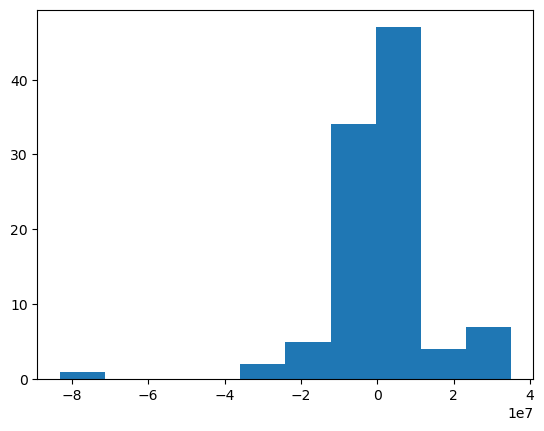

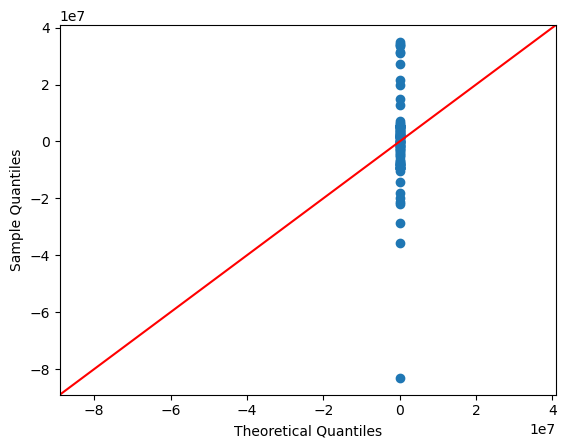

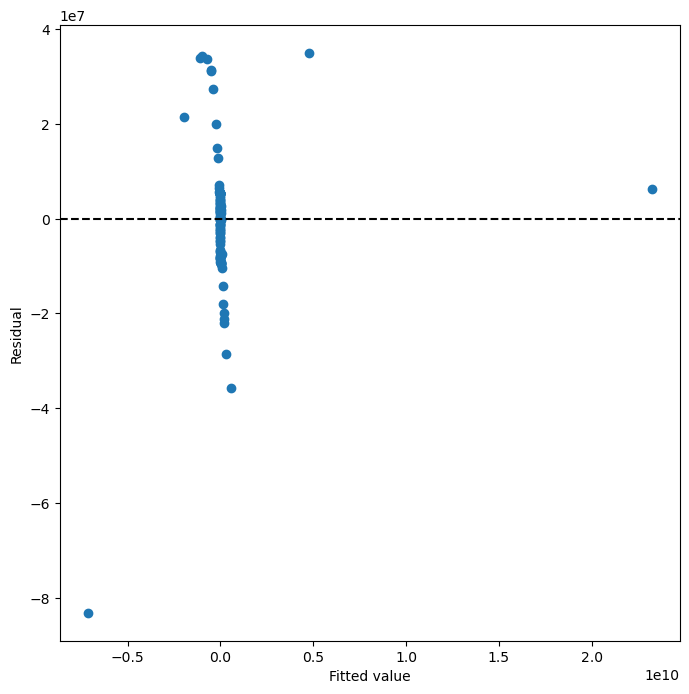

In [403]:
reg = skl.Lasso(tuned_lasso.alpha_, fit_intercept = True)
reg.fit(Xs,Y)
print('R squared training set', round(reg.score(Xs, Y)*100, 2))

Y_pred = reg.predict(Xs)
resid = Y - Y_pred
plt.hist(resid)
sm.qqplot(resid, line ='45') 
print('MSE',np.mean(resid**2))


ax = subplots(figsize=(8,8))[1]
ax.scatter(Y_pred, resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

# Abalone Dataset Competition

### Import Data

In [404]:
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from matplotlib.pyplot import subplots


In [489]:
# Import and view the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

abalone = pd.read_csv('train.csv')
print(abalone['Sex'].value_counts())

abalone = pd.get_dummies(abalone, columns=['Sex'], drop_first = False)
print(abalone)

print('Missing Rings: ', np.isnan(abalone['Rings']).sum())

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64
          id  Length  Diameter  Height  Whole weight  Whole weight.1  \
0          0   0.550     0.430   0.150        0.7715          0.3285   
1          1   0.630     0.490   0.145        1.1300          0.4580   
2          2   0.160     0.110   0.025        0.0210          0.0055   
3          3   0.595     0.475   0.150        0.9145          0.3755   
4          4   0.555     0.425   0.130        0.7820          0.3695   
...      ...     ...       ...     ...           ...             ...   
90610  90610   0.335     0.235   0.075        0.1585          0.0685   
90611  90611   0.555     0.425   0.150        0.8790          0.3865   
90612  90612   0.435     0.330   0.095        0.3215          0.1510   
90613  90613   0.345     0.270   0.075        0.2000          0.0980   
90614  90614   0.425     0.325   0.100        0.3455          0.1525   

       Whole weight.2  Shell weight  Rings  Sex_F  Sex_I  Sex_M  
0     

## Data Visualization

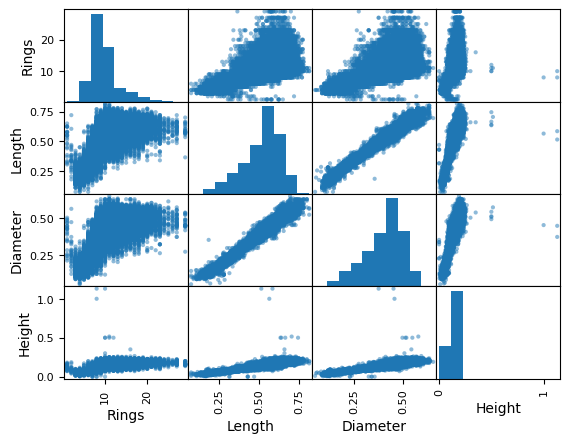

In [633]:
pd.plotting.scatter_matrix(abalone[['Rings',
                                 'Length',
                                 'Diameter',
                                   'Height']]);

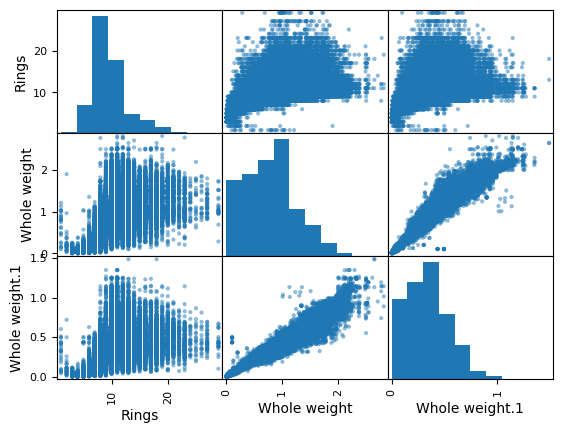

In [634]:
pd.plotting.scatter_matrix(abalone[['Rings',
                                 'Whole weight',
                                 'Whole weight.1']]);

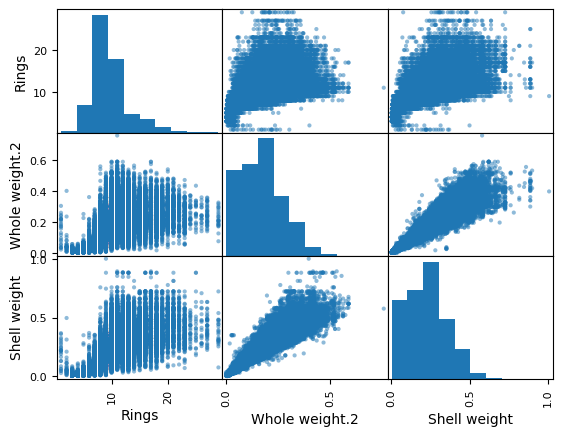

In [635]:
pd.plotting.scatter_matrix(abalone[['Rings',
                                 'Whole weight.2',
                                 'Shell weight']]);

## Model 1: Regularization

### Normalize Y

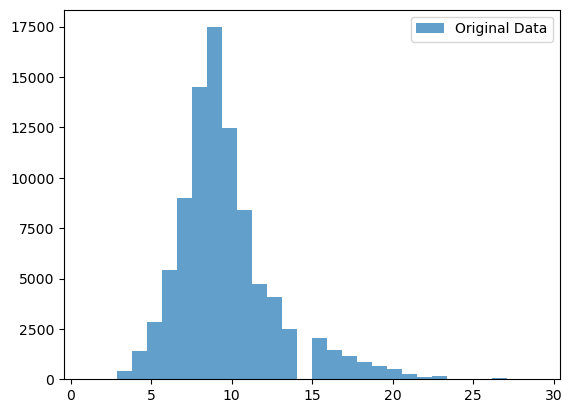

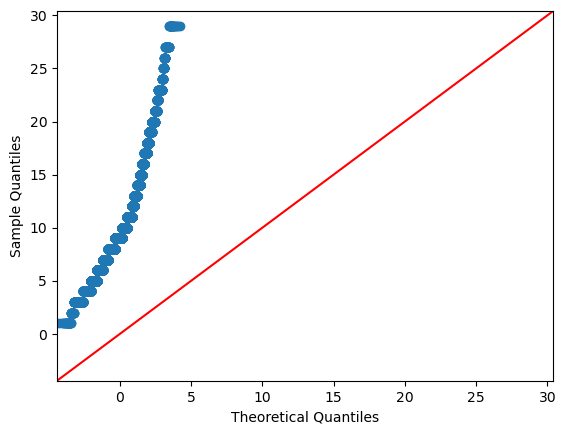

In [512]:
data = abalone['Rings'].to_numpy().reshape(-1, 1)


plt.hist(data, bins=30, alpha=0.7, label='Original Data')
plt.legend()

sm.qqplot(abalone['Rings'], line ='45') 
plt.show()


https://www.geeksforgeeks.org/powertransformer-in-scikit-learn/  
https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.PowerTransformer.html


In [408]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
data = abalone['Rings'].to_numpy().reshape(-1, 1)
print(pt.fit(data))
print(pt.lambdas_)
data2 = pt.transform(data)
print(data2)


PowerTransformer()
[0.00897431]
[[ 0.54528173]
 [ 0.54528173]
 [-1.3405492 ]
 ...
 [-1.3405492 ]
 [-1.3405492 ]
 [-0.46238995]]


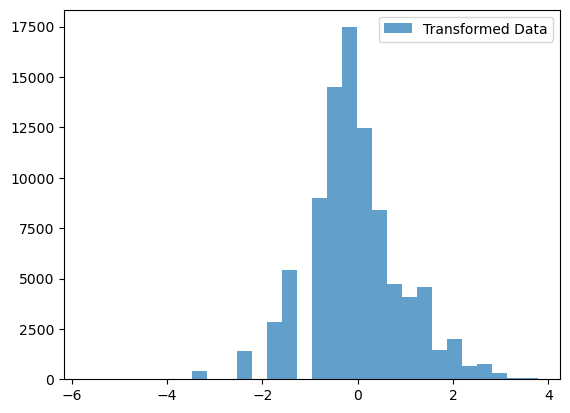

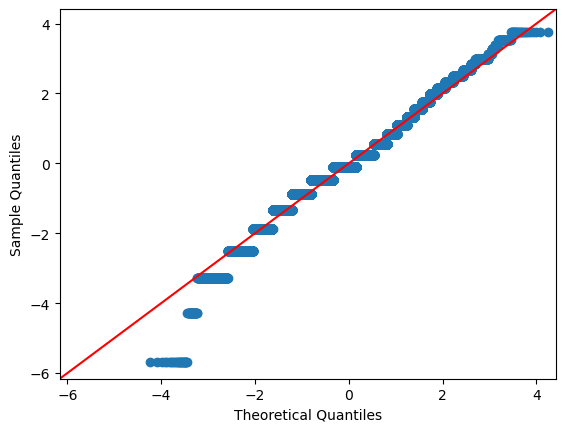

In [409]:
abalone['Rings'] = data2

plt.hist(data2, bins=30, alpha=0.7, label='Transformed Data')
plt.legend()

sm.qqplot(abalone['Rings'], line ='45') 

plt.show()


## Ridge Regression

In [594]:
design = MS(abalone.columns.drop('Rings')).fit(abalone)
Y = np.array(abalone['Rings'])
D = design.fit_transform(abalone)
D = D.drop(['intercept', 'id', 'Sex_I'], axis=1)
X = np.asarray(D)

In [595]:
Xs = X - X.mean(0)[None,:]
X_scale = X.std(0)
Xs = Xs / X_scale[None,:]
lambdas = 10**np.linspace(8, -2, 100) / Y.std()
soln_array = skl.ElasticNet.path(Xs,
                                 Y,
                                 l1_ratio=0.,
                                 alphas=lambdas)[1]
soln_array.shape

C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4717239.458490019, tolerance: 943.4479
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: Con

(9, 100)

In [596]:
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns,
                         index=-np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'
soln_path

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex_F,Sex_M
negative log(lambda),,,,,,,,,
-17.264994,6.292916e-08,6.424534e-08,6.716483e-08,6.227223e-08,5.196131e-08,5.941528e-08,7.008980e-08,2.990274e-08,2.421671e-08
-17.032410,7.940759e-08,8.106842e-08,8.475240e-08,7.857864e-08,6.556773e-08,7.497358e-08,8.844329e-08,3.773297e-08,3.055802e-08
-16.799825,1.002010e-07,1.022967e-07,1.069454e-07,9.915499e-08,8.273708e-08,9.460592e-08,1.116028e-07,4.761361e-08,3.855985e-08
-16.567241,1.264393e-07,1.290838e-07,1.349498e-07,1.251194e-07,1.044023e-07,1.193791e-07,1.408267e-07,6.008155e-08,4.865701e-08
-16.334657,1.595483e-07,1.628853e-07,1.702873e-07,1.578828e-07,1.317408e-07,1.506393e-07,1.777031e-07,7.581431e-08,6.139817e-08
...,...,...,...,...,...,...,...,...,...
4.830519,-7.426706e-02,6.118329e-01,8.446826e-01,1.016529e+00,-2.723775e+00,-5.117695e-01,2.684098e+00,3.357433e-01,3.379362e-01
5.063104,-9.679136e-02,6.354859e-01,8.380213e-01,1.109441e+00,-2.804177e+00,-5.390953e-01,2.703325e+00,3.342318e-01,3.373496e-01
5.295688,-1.178699e-01,6.575534e-01,8.321734e-01,1.196909e+00,-2.874543e+00,-5.641758e-01,2.715044e+00,3.328952e-01,3.367803e-01


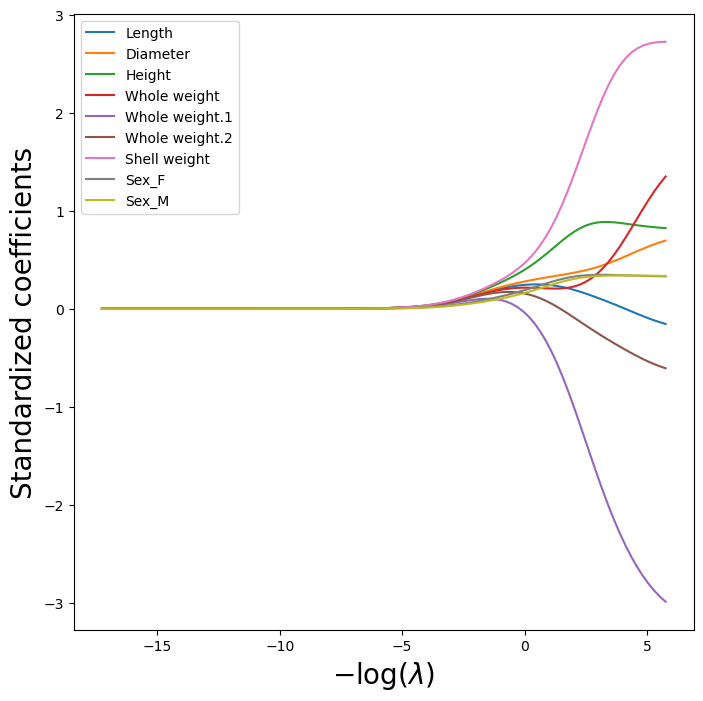

In [597]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left');

In [598]:
scaler = StandardScaler(with_mean=True,  with_std=True)
ridgeCV = skl.ElasticNetCV(alphas=lambdas, 
                           l1_ratio=0,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('ridge', ridgeCV)])
pipeCV.fit(X, Y)

C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 365565.15017559065, tolerance: 73.11303669370409
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.p

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 ElasticNetCV(alphas=array([3.14841296e+07, 2.49506343e+07, 1.97729510e+07, 1.56697255e+07,
       1.24179895e+07, 9.84104429e+06, 7.79885930e+06, 6.18046262e+06,
       4.89791093e+06, 3.88151065e+06, 3.07603081e+06, 2.43770181e+06,
       1.93183700e+06, 1.53094778e+06, 1.21324994e+06, 9.61479826e+05,
       7.61956319e+05, 6.03837352e+05,...
       2.61386775e-01, 2.07144549e-01, 1.64158513e-01, 1.30092814e-01,
       1.03096330e-01, 8.17020785e-02, 6.47475000e-02, 5.13112865e-02,
       4.06633170e-02, 3.22249833e-02, 2.55377482e-02, 2.02382287e-02,
       1.60384501e-02, 1.27101975e-02, 1.00726141e-02, 7.98237443e-03,
       6.32589522e-03, 5.01316378e-03, 3.97284656e-03, 3.14841296e-03]),
                              cv=KFold(n_splits=5, random_state=0, shuffle=True),
                              l1_ratio=0))])

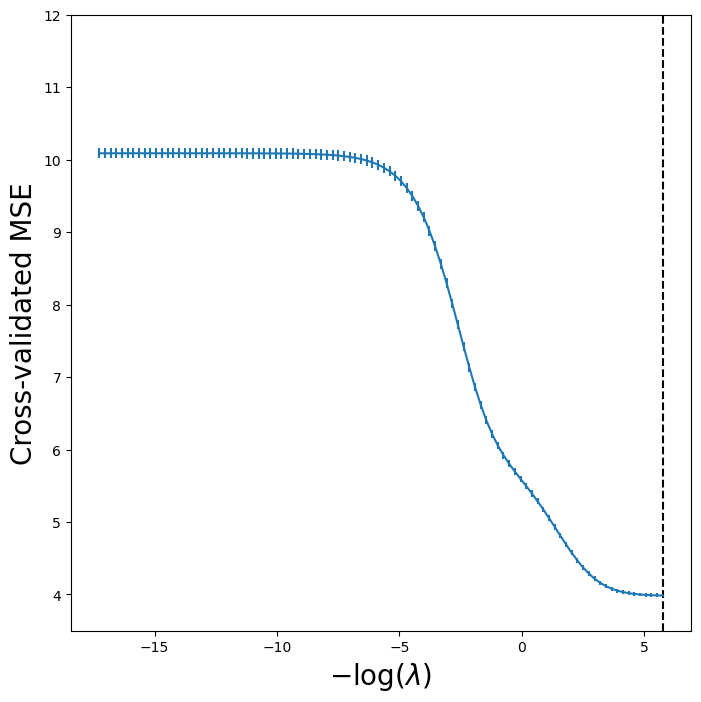

In [599]:
tuned_ridge = pipeCV.named_steps['ridge']
ridgeCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            tuned_ridge.mse_path_.mean(1),
            yerr=tuned_ridge.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_ridge.alpha_), c='k', ls='--')
ax.set_ylim([3.5,12])
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [600]:
print('MSE: ', np.min(tuned_ridge.mse_path_.mean(1)))
print('R2: ', 1-np.min(tuned_ridge.mse_path_.mean(1))/np.var(Y))

MSE:  3.9851322483789033
R2:  0.6049736002359765


In [601]:
tuned_ridge.coef_

array([-0.15450844,  0.69572442,  0.82289304,  1.34942979, -2.98757435,
       -0.60679978,  2.72386204,  0.33073878,  0.33577347])

In [602]:
tuned_ridge.intercept_

9.696794129007339

### Test Error

In [603]:
outer_valid = skm.ShuffleSplit(n_splits=1, 
                               test_size=0.25,
                               random_state=1)
inner_cv = skm.KFold(n_splits=5,
                     shuffle=True,
                     random_state=2)
ridgeCV = skl.ElasticNetCV(alphas=lambdas,
                           l1_ratio=0,
                           cv=inner_cv)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('ridge', ridgeCV)]);

In [604]:
results = skm.cross_validate(pipeCV, 
                             X,
                             Y,
                             cv=outer_valid,
                             scoring='neg_mean_squared_error')


C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271919.8171250694, tolerance: 54.38396834718951
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py

In [605]:
-results['test_score']

array([4.00118392])

## Lasso

In [606]:
lassoCV = skl.ElasticNetCV(n_alphas=100, 
                           l1_ratio=1,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_

0.002206716823588562

In [607]:
lambdas, soln_array = skl.Lasso.path(Xs, 
                                    Y,
                                    l1_ratio=1,
                                    n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns,
                         index=-np.log(lambdas))

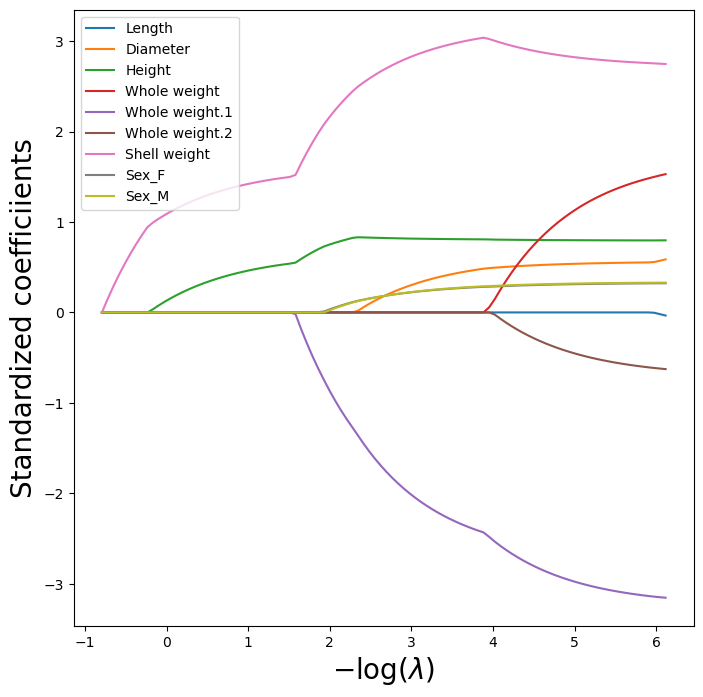

In [608]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);

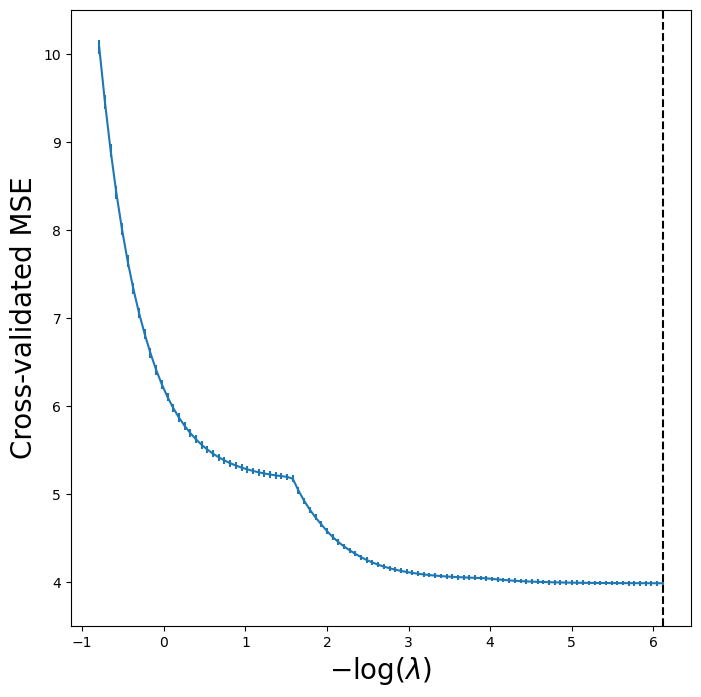

In [609]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_ylim([3.5,10.5])
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [610]:
print('MSE: ', np.min(tuned_lasso.mse_path_.mean(1)))
print('R2: ', 1-np.min(tuned_lasso.mse_path_.mean(1))/np.var(Y))

MSE:  3.9827436732671813
R2:  0.6052103678432078


In [611]:
tuned_lasso.coef_


array([-0.03673476,  0.58875157,  0.79738802,  1.52815745, -3.154339  ,
       -0.62639054,  2.74732313,  0.3223601 ,  0.32930808])

In [612]:
tuned_lasso.intercept_

9.696794129007339

R squared training set 60.54
MSE 3.980570067188294


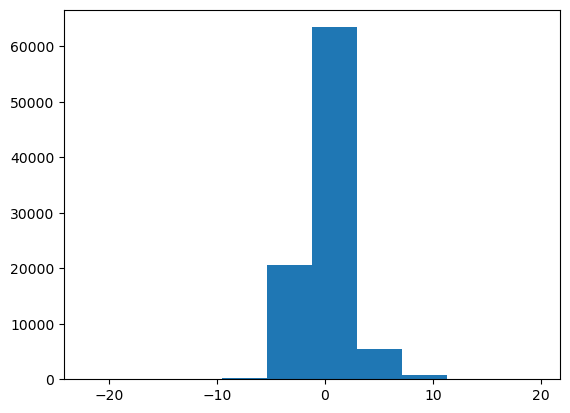

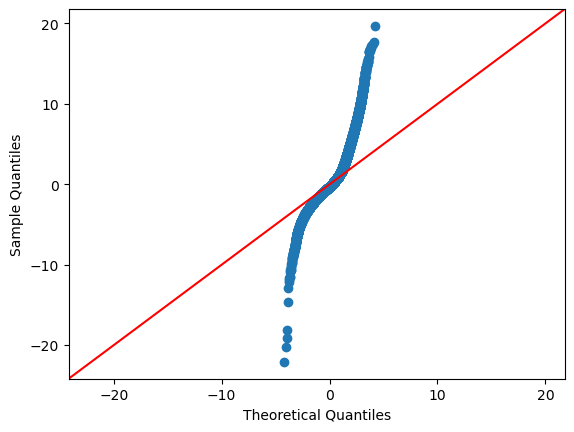

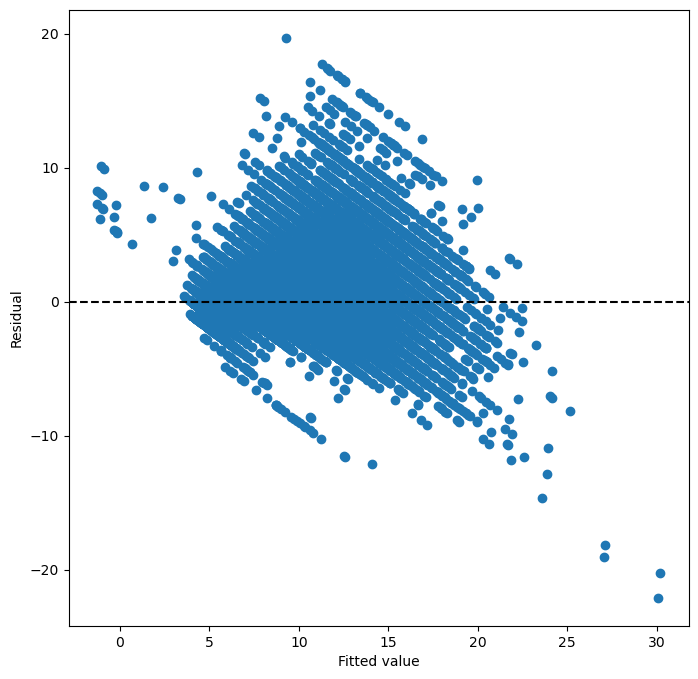

In [613]:
reg = skl.Lasso(tuned_lasso.alpha_, fit_intercept = True)
reg.fit(Xs,Y)
print('R squared training set', round(reg.score(Xs, Y)*100, 2))

Y_pred = reg.predict(Xs)
resid = Y - Y_pred
plt.hist(resid)
sm.qqplot(resid, line ='45') 
print('MSE',np.mean(resid**2))


ax = subplots(figsize=(8,8))[1]
ax.scatter(Y_pred, resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

### Model Fit

R squared training set 60.54
MSE 3.980570067188294


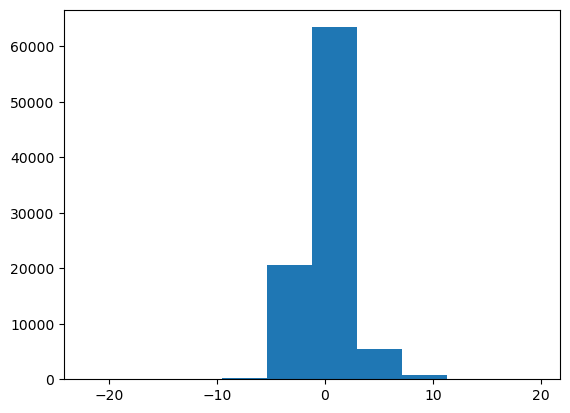

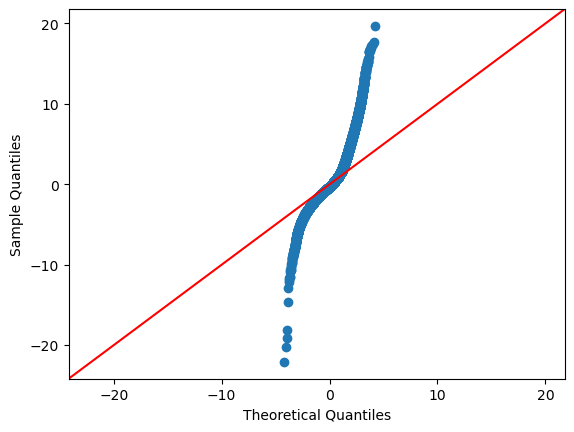

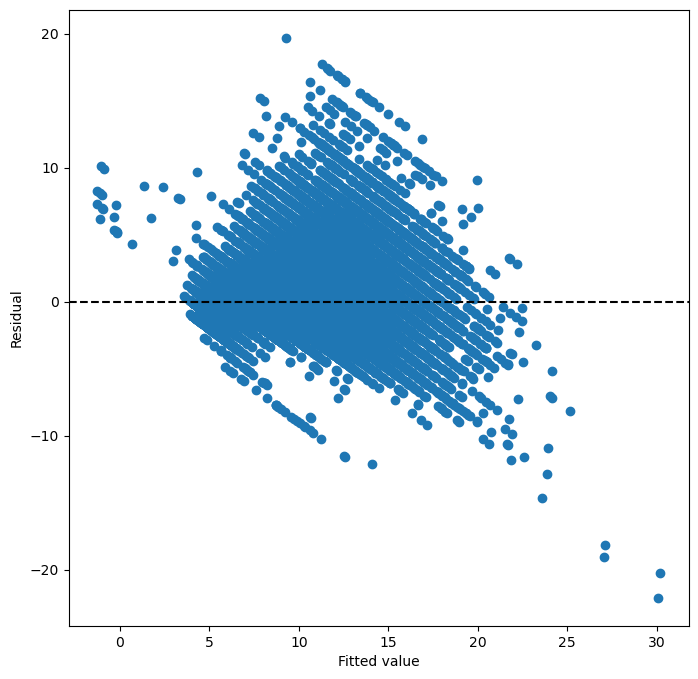

In [614]:
reg = skl.Lasso(tuned_lasso.alpha_, fit_intercept = True)
reg.fit(Xs,Y)
print('R squared training set', round(reg.score(Xs, Y)*100, 2))

Y_pred = reg.predict(Xs)
resid = Y - Y_pred
plt.hist(resid)
sm.qqplot(resid, line ='45') 
print('MSE',np.mean(resid**2))


ax = subplots(figsize=(8,8))[1]
ax.scatter(Y_pred, resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

### Test MSE

In [615]:
outer_valid = skm.ShuffleSplit(n_splits=1, 
                               test_size=0.25,
                               random_state=1)
inner_cv = skm.KFold(n_splits=5,
                     shuffle=True,
                     random_state=2)
ridgeCV = skl.ElasticNetCV(alphas=lambdas,
                           l1_ratio=1,
                           cv=inner_cv)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('lasso', lassoCV)]);

In [616]:
results = skm.cross_validate(pipeCV, 
                             X,
                             Y,
                             cv=outer_valid,
                             scoring='neg_mean_squared_error')


In [617]:
-results['test_score']

array([3.99886975])

### Export Predictions

In [621]:
test = pd.read_csv('test.csv')

test = pd.get_dummies(test, columns=['Sex'], drop_first = False)
design = MS(test.columns.drop(['id', 'Sex_I'])).fit(test)
D = design.fit_transform(test)
D = D.drop('intercept', axis=1)
Xtest = np.asarray(D)

Xs_test = Xtest - Xtest.mean(0)[None,:]
Xtest_scale = Xtest.std(0)
Xs_test = Xs_test / Xtest_scale[None,:]

Rings = np.round(reg.predict(Xs_test), 0)

output = pd.DataFrame(test[['id']])
output['Rings'] = Rings
print(output)
output.to_csv('model3.csv', index = False)

           id  Length  Diameter  Height  Whole weight  Whole weight.1  \
0       90615   0.645     0.475   0.155        1.2380          0.6185   
1       90616   0.580     0.460   0.160        0.9830          0.4785   
2       90617   0.560     0.420   0.140        0.8395          0.3525   
3       90618   0.570     0.490   0.145        0.8740          0.3525   
4       90619   0.415     0.325   0.110        0.3580          0.1575   
...       ...     ...       ...     ...           ...             ...   
60406  151021   0.345     0.260   0.085        0.1775          0.0735   
60407  151022   0.525     0.410   0.145        0.8445          0.3885   
60408  151023   0.590     0.440   0.155        1.1220          0.3930   
60409  151024   0.660     0.525   0.190        1.4935          0.5885   
60410  151025   0.430     0.340   0.120        0.4150          0.1525   

       Whole weight.2  Shell weight  Sex_F  Sex_I  Sex_M  
0              0.3125        0.3005  False  False   True  
1    

# Model 2: Principal Components

In [622]:
pca = PCA(n_components=2)
linreg = skl.LinearRegression()
pipe = Pipeline([('scaler', scaler), 
                 ('pca', pca),
                 ('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_

array([ 0.7858737 , -0.01301444])

In [623]:
param_grid = {'pca__n_components': range(1, 10)}
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('linreg', LinearRegression())]),
             param_grid={'pca__n_components': range(1, 10)},
             scoring='neg_mean_squared_error')

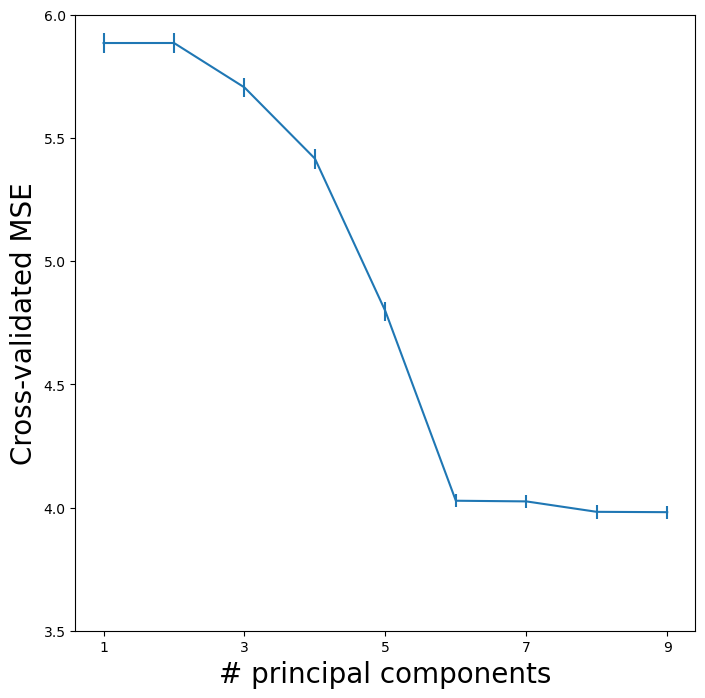

In [624]:
pcr_fig, ax = subplots(figsize=(8,8))
n_comp = param_grid['pca__n_components']
ax.errorbar(n_comp,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2])
ax.set_ylim([3.5,6]);

In [625]:
Xn = np.zeros((X.shape[0], 1))
cv_null = skm.cross_validate(linreg,
                             Xn,
                             Y,
                             cv=kfold,
                             scoring='neg_mean_squared_error')
-cv_null['test_score'].mean()

10.088304930714505

In [626]:
pipe.named_steps['pca'].explained_variance_ratio_

array([0.7562398 , 0.16247835])

### Model with 6 Compenents

In [627]:
pca = PCA(n_components=6)
linreg = skl.LinearRegression()
pipe = Pipeline([('scaler', scaler), 
                 ('pca', pca),
                 ('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_

array([ 0.7858737 , -0.01301444,  0.79038682,  1.23997866,  2.31584348,
        3.23974843])

In [628]:
pipe.named_steps['linreg'].intercept_

9.696794129007339

https://builtin.com/data-science/step-step-explanation-principal-component-analysis  
And Frees Book

Code  
https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA  

In [629]:
X_new = pipe.named_steps['pca'].fit_transform(X)
print(X_new)

[[ 1.65738058e-01 -7.20411052e-01  2.69378083e-01  3.60856805e-02
   1.65894042e-02  1.48226041e-02]
 [ 5.37517930e-01 -7.00077376e-01  8.23155124e-02  3.42178102e-02
  -2.76081518e-03 -2.48672747e-02]
 [-1.07056919e+00 -1.17272492e-01  3.11634411e-02 -1.85922458e-01
  -1.01988901e-01  1.08479952e-02]
 ...
 [-6.81720575e-01 -9.54713518e-02 -1.53897375e-01  2.95594815e-02
   3.53590860e-02 -1.36008337e-02]
 [-8.24031272e-01 -1.03433286e-01 -8.49360903e-02 -2.52770624e-02
  -8.00198123e-03  1.14449936e-02]
 [-6.60727096e-01 -9.43924007e-02 -1.64697104e-01  2.44596808e-02
   1.29613216e-02 -4.77424442e-04]]


In [630]:
Y_pred = pipe.named_steps['linreg'].predict(X_new)
print(Y_pred)

[10.18051739 10.14885957  8.45003393 ...  9.11512787  8.97062793
  9.10739927]


MSE 8.462403703048913
R^2 0.16116388119240255


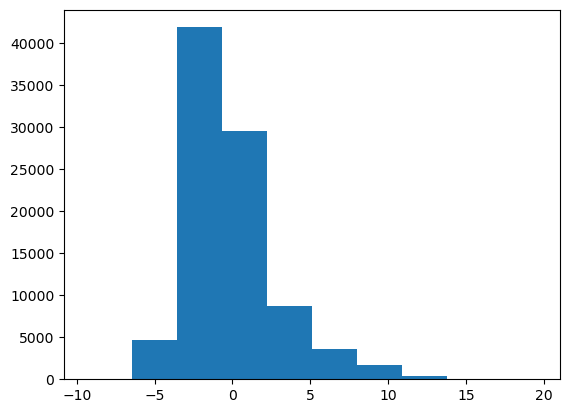

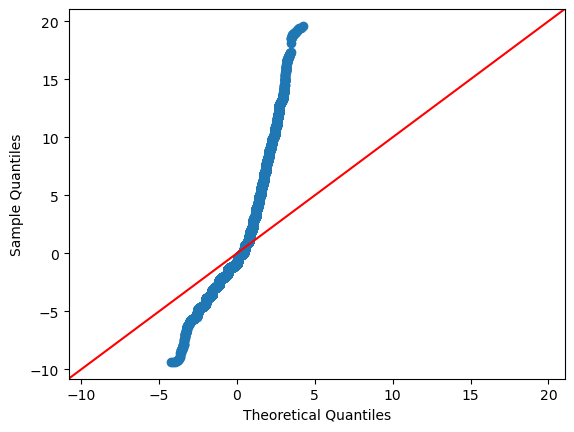

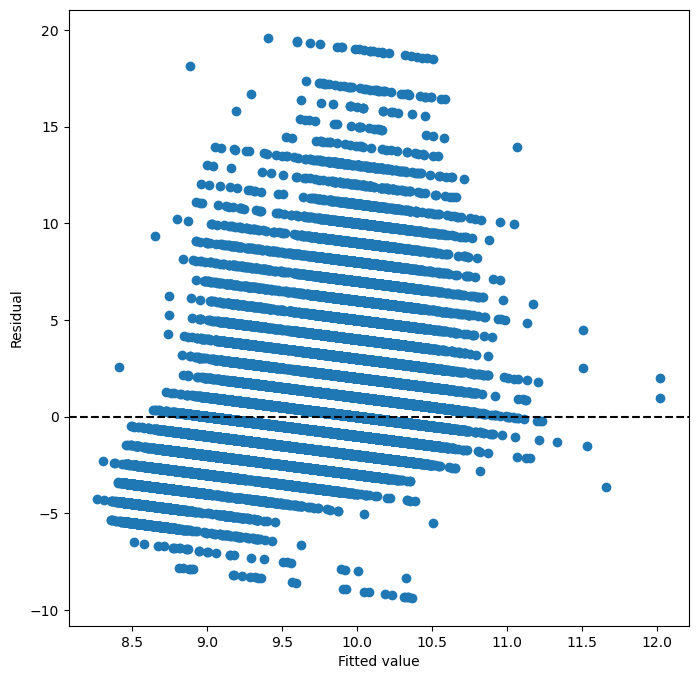

In [631]:
resid = Y - Y_pred
plt.hist(resid)
sm.qqplot(resid, line ='45') 
print('MSE',np.mean(resid**2))
print('R^2',1-np.mean(resid**2)/np.var(Y))

ax = subplots(figsize=(8,8))[1]
ax.scatter(Y_pred, resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

### Export Predictions

In [632]:
test = pd.read_csv('test.csv')

test = pd.get_dummies(test, columns=['Sex'], drop_first = False)
design = MS(test.columns.drop(['id', 'Sex_I'])).fit(test)
D = design.fit_transform(test)
D = D.drop('intercept', axis=1)
Xtest = np.asarray(D)

Xtest_new = pipe.named_steps['pca'].fit_transform(Xtest)

Rings = np.round(pipe.named_steps['linreg'].predict(Xtest_new), 0)

output = pd.DataFrame(test[['id']])
output['Rings'] = Rings
print(output)
output.to_csv('model4.csv', index = False)

           id  Rings
0       90615   10.0
1       90616   10.0
2       90617   10.0
3       90618   10.0
4       90619    9.0
...       ...    ...
60406  151021    9.0
60407  151022   10.0
60408  151023    9.0
60409  151024   10.0
60410  151025   10.0

[60411 rows x 2 columns]
